# Problema 2


In [1]:
import numpy as np
import fem

In [2]:
MN =  np.array([[0,0,0], [8,0,0], [16,0,0], [8,4,0]]) # matriz de nodos
MC = np.array([[0,3], [0,1], [1,3], [2,3], [1,2]]) # matriz de conectividad
glxn = 2 # grados de libertd por nodo

E = np.array(5*[210e9])
A = np.array([10, 10, 20, 10, 10])*1e-4

Nn = MN.shape[0] #cantidad de nodos
Ne, Nnxe = MC.shape # Cantidad de elementos, cantidad de nodos por elementos

In [3]:
def k_elemento_barra(MC, MN, Ee, Ae, e):
    Nn = MN.shape
    nodo1 = MC[e, 0]
    nodo2 = MC[e, 1]
    coord_nodo1 = np.array([MN[nodo2, 0]-MN[nodo1, 0], MN[nodo2, 1]-MN[nodo1, 1]])
    long = np.linalg.norm(coord_nodo1)
    phi = np.arctan2(coord_nodo1[1], coord_nodo1[0])
    c = np.cos(phi)
    s = np.sin(phi)
     
    ke = Ee*Ae/long
    
    k_elemento = ke*np.array([ [c**2,   c*s,  -c**2, -c*s],
                            [c*s,    s**2, -c*s,  -s**2],
                            [-c**2, -c*s,   c**2,  c*s],
                            [-c*s,  -s**2,  c*s,   s**2]])
    return k_elemento

In [4]:
k_elementos = {}
k_global = np.zeros((Nn*glxn, Nn*glxn))
# print(k_global)
for e in range(Ne):
    k_elementos[e] = k_elemento_barra(MC, MN, E[e], A[e], e)
    fe = np.abs(k_elementos[e].max()) #factor de escala
#     print(fe)
    for i in range(Nnxe):
        rango_i = np.linspace(i*glxn, (i+1)*glxn-1, Nnxe, dtype= int)
        rango_n_i = np.linspace(MC[e,i]*glxn, (MC[e,i]+1)*glxn-1, Nnxe, dtype= int)
        for j in range(Nnxe):
            rango_j = np.linspace(j*glxn, (j+1)*glxn-1, Nnxe, dtype= int)
            rango_n_j = np.linspace(MC[e,j]*glxn, (MC[e,j]+1)*glxn-1, Nnxe, dtype= int)
            k_global[np.ix_(rango_n_i, rango_n_j)] += k_elementos[e][np.ix_(rango_i, rango_j)]
k_global

array([[ 4.50329710e+07,  9.39148551e+06, -2.62500000e+07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.87829710e+07, -9.39148551e+06],
       [ 9.39148551e+06,  4.69574275e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.39148551e+06, -4.69574275e+06],
       [-2.62500000e+07,  0.00000000e+00,  5.25000000e+07,
         6.42939570e-09, -2.62500000e+07,  0.00000000e+00,
        -3.93686943e-25, -6.42939570e-09],
       [ 0.00000000e+00,  0.00000000e+00,  6.42939570e-09,
         1.05000000e+08,  0.00000000e+00,  0.00000000e+00,
        -6.42939570e-09, -1.05000000e+08],
       [ 0.00000000e+00,  0.00000000e+00, -2.62500000e+07,
         0.00000000e+00,  4.50329710e+07, -9.39148551e+06,
        -1.87829710e+07,  9.39148551e+06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39148551e+06,  4.69574275e+06,
         9.39148551e+06, -4.69574275e+06],
       [-1.87829710e+07, -9.391485

In [5]:
N = Nn*glxn
s = np.array([0,1,5])
r = np.array([i for i in range(N) if i not in s])
# otra forma de hacerlo
#r = list(range(N))
# r = [r.remove(thiss) for thiss in s]

fr = np.zeros_like(r)
us = np.zeros_like(s)
fr[r==3] = -20e3

u, f = fem.solve(k=k_global, s=s,r=r, us=us, fr=fr)

In [6]:
u

array([[ 0.        ],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.00384387],
       [ 0.00152381],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.0036534 ]])

<div style="background:#999900">por que nadie me hace el dibugito</div>

In [10]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12,8))
plt.rc('font', size=20)

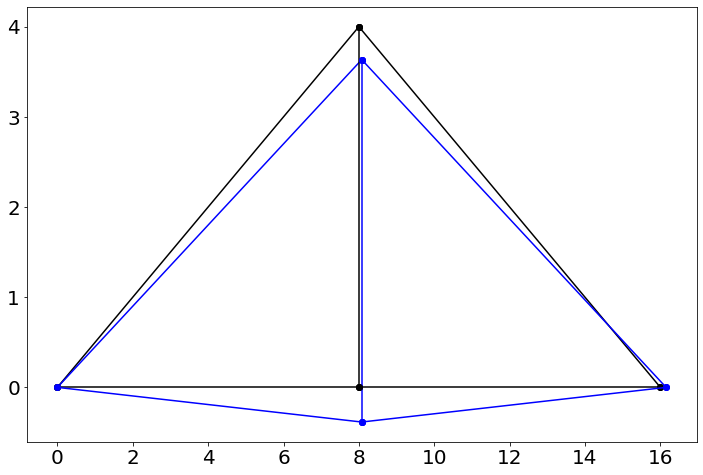

In [11]:
DXY = np.reshape(u, (len(MN),2))

MND = MN[:,:2] +DXY*100

fig, ax = plt.subplots()
for L in MC:
    ax.plot(MN[L,0], MN[L,1], '-ok')
    ax.plot(MND[L,0], MND[L,1], '-ob')

<div style="background:#999900">te faltarían  las tensiones. las podes calcular viendo las nuevas longitudes de las barras a partir de la nueva MND y luego calculando los $\varepsilon = \dfrac{\Delta L}{L}$</div>